In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
DATA_FILE = 'benchmark_results.csv'
df = pd.read_csv(DATA_FILE)

# Convert times to milliseconds
df['mean'] = df['mean'] * 1000
df['stdev'] = df['stdev'] * 1000

# Set the style
plt.style.use('default')
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.2)

# Define a consistent color palette for 'octree' categories
octree_types = df['octree'].unique()
palette = sns.color_palette("Set2", len(octree_types))
color_dict = dict(zip(octree_types, palette))

# Create a function for adding execution details to plot titles
def get_execution_details(data):
    search_size = data['search_size'].iloc[0]
    repeats = data['repeats'].iloc[0]
    return f'\nSearch Size: {search_size:,} points, Repeats: {repeats}'



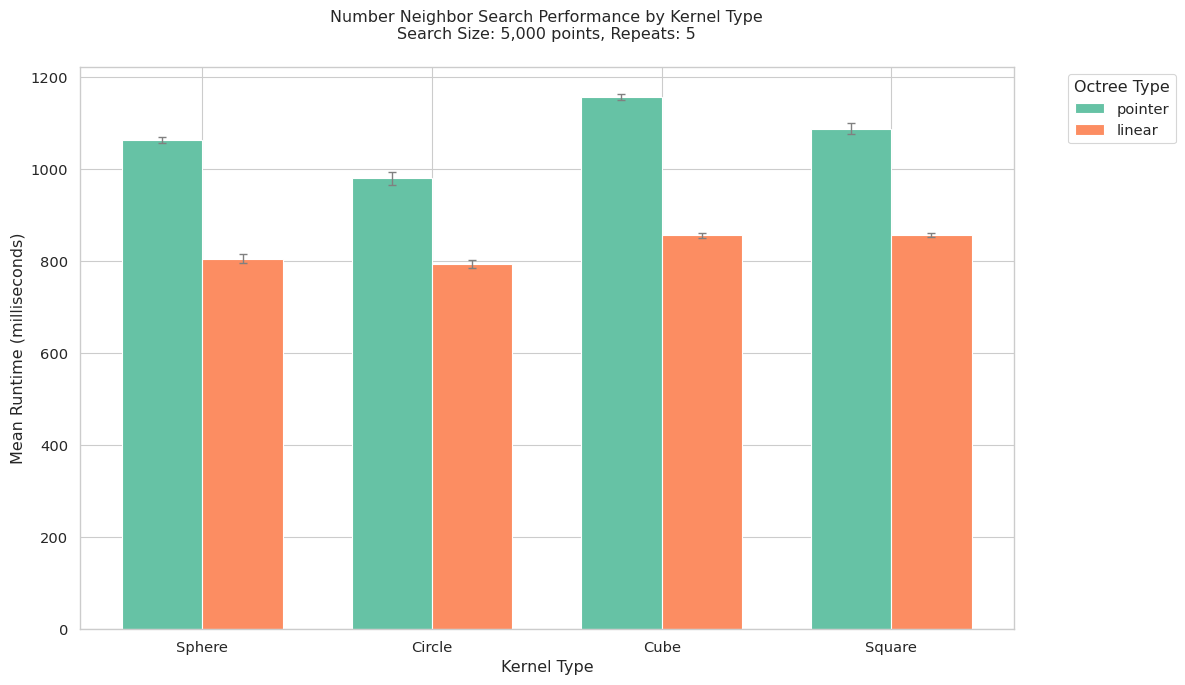

In [2]:
# 1. Neighbor Search Performance
plt.figure(figsize=(12, 7))
neigh_search_df = df[df['operation'] == 'neighSearch']

# Create error bar plot
ax = plt.gca()
bar_width = 0.35
x_positions = []
for i, kernel in enumerate(neigh_search_df['kernel'].unique()):
    kernel_data = neigh_search_df[neigh_search_df['kernel'] == kernel]
    x_pos = [i - bar_width/2, i + bar_width/2]
    x_positions.extend(x_pos)
    
    for j, (idx, row) in enumerate(kernel_data.iterrows()):
        x = x_pos[j]
        plt.bar(x, row['mean'], bar_width, 
                color=color_dict[row['octree']], 
                label=row['octree'] if i == 0 else "")
        plt.errorbar(x, row['mean'], row['stdev'], 
                    color='gray', capsize=3, capthick=1, 
                    fmt='none', elinewidth=1)
        # Add value labels
        # plt.text(x, row['mean'], f'{row["mean"]:.2f}', 
        #         ha='center', va='bottom')

plt.xticks(range(len(neigh_search_df['kernel'].unique())), 
           neigh_search_df['kernel'].unique())
plt.title('Number Neighbor Search Performance by Kernel Type' + 
          get_execution_details(neigh_search_df), 
          pad=20)
plt.xlabel('Kernel Type')
plt.ylabel('Mean Runtime (milliseconds)')
plt.legend(title='Octree Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('neighbor_search_performance.png', dpi=300, bbox_inches='tight')

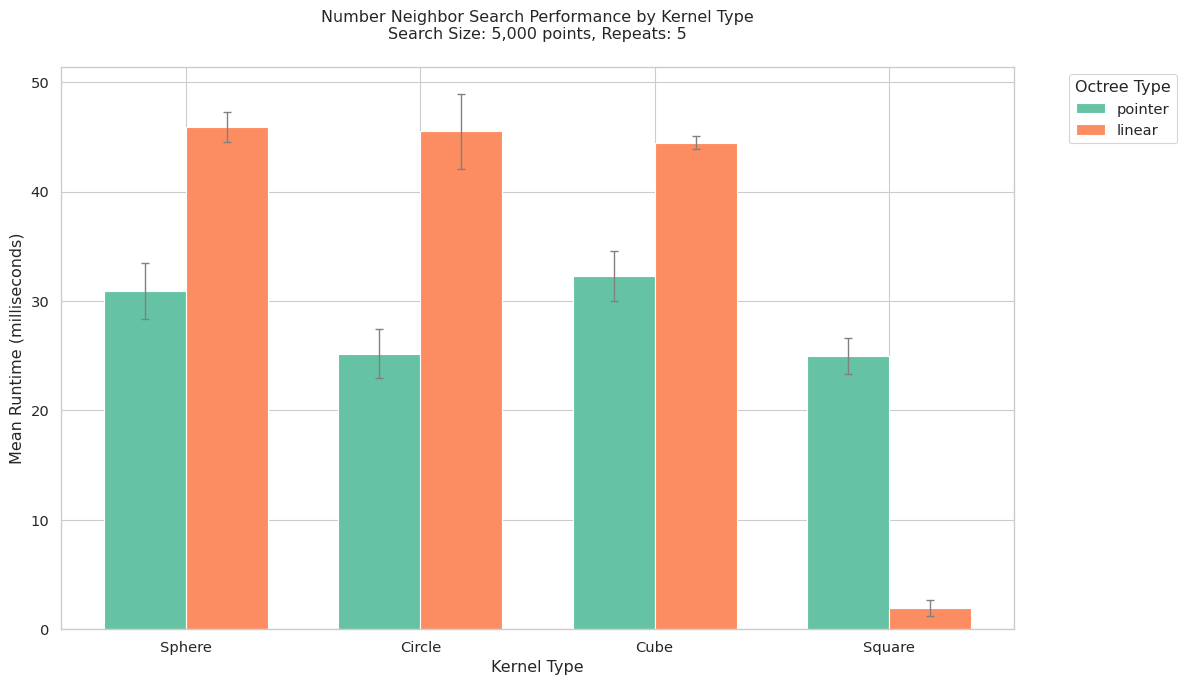

In [3]:
# 2. Number Neighbor Search Performance (with measured std dev)
plt.figure(figsize=(12, 7))
num_neigh_search_df = df[df['operation'] == 'numNeighSearch']

# Create error bar plot
ax = plt.gca()
bar_width = 0.35
x_positions = []
for i, kernel in enumerate(num_neigh_search_df['kernel'].unique()):
    kernel_data = num_neigh_search_df[num_neigh_search_df['kernel'] == kernel]
    x_pos = [i - bar_width/2, i + bar_width/2]
    x_positions.extend(x_pos)
    
    for j, (idx, row) in enumerate(kernel_data.iterrows()):
        x = x_pos[j]
        plt.bar(x, row['mean'], bar_width, 
                color=color_dict[row['octree']], 
                label=row['octree'] if i == 0 else "")
        plt.errorbar(x, row['mean'], row['stdev'], 
                    color='gray', capsize=3, capthick=1, 
                    fmt='none', elinewidth=1)
        # Add value labels
        # plt.text(x, row['mean'], f'{row["mean"]:.2f}', 
        #         ha='center', va='bottom')

plt.xticks(range(len(num_neigh_search_df['kernel'].unique())), 
           num_neigh_search_df['kernel'].unique())
plt.title('Number Neighbor Search Performance by Kernel Type' + 
          get_execution_details(num_neigh_search_df), 
          pad=20)
plt.xlabel('Kernel Type')
plt.ylabel('Mean Runtime (milliseconds)')
plt.legend(title='Octree Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('num_neighbor_search_performance.png', dpi=300, bbox_inches='tight')

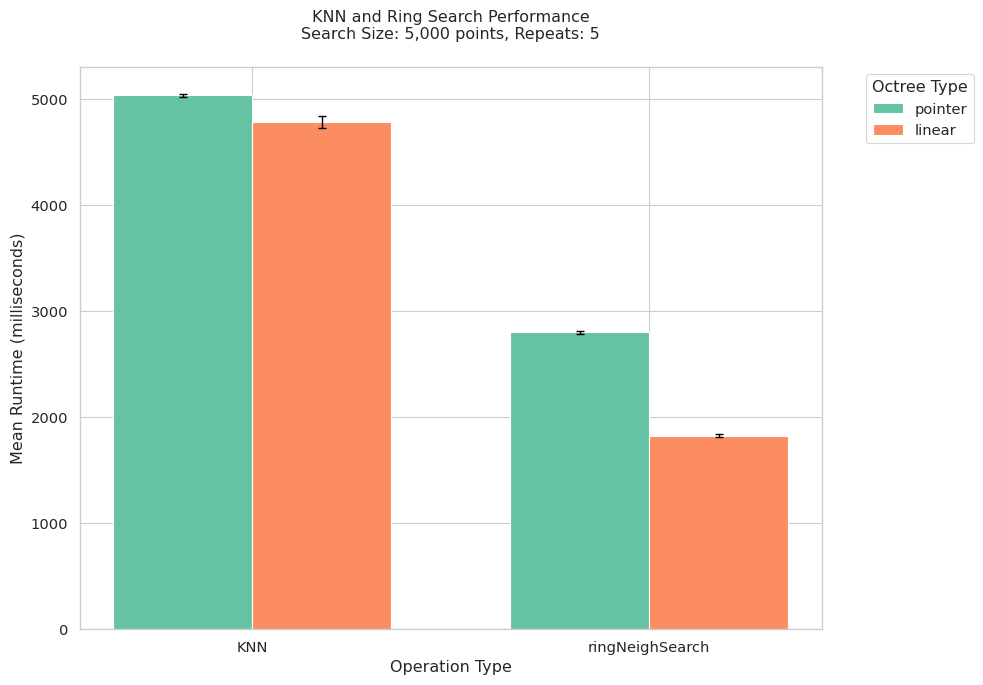

In [4]:
# 3. KNN and Ring Search Performance (with measured std dev)
plt.figure(figsize=(10, 7))
other_ops_df = df[df['operation'].isin(['KNN', 'ringNeighSearch'])]

# Create error bar plot
ax = plt.gca()
bar_width = 0.35
x_positions = []
for i, operation in enumerate(other_ops_df['operation'].unique()):
    op_data = other_ops_df[other_ops_df['operation'] == operation]
    x_pos = [i - bar_width/2, i + bar_width/2]
    x_positions.extend(x_pos)
    
    for j, (idx, row) in enumerate(op_data.iterrows()):
        x = x_pos[j]
        plt.bar(x, row['mean'], bar_width, 
                color=color_dict[row['octree']], 
                label=row['octree'] if i == 0 else "")
        plt.errorbar(x, row['mean'], row['stdev'], 
                    color='black', capsize=3, capthick=1, 
                    fmt='none', elinewidth=1)
        # Add value labels
        # plt.text(x, row['mean'], f'{row["mean"]:.2f}', 
        #         ha='center', va='bottom')

plt.xticks(range(len(other_ops_df['operation'].unique())), 
           other_ops_df['operation'].unique())
plt.title('KNN and Ring Search Performance' + 
          get_execution_details(other_ops_df), 
          pad=20)
plt.xlabel('Operation Type')
plt.ylabel('Mean Runtime (milliseconds)')
plt.legend(title='Octree Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('knn_ring_search_performance.png', dpi=300, bbox_inches='tight')